# Assessing the Impact of Weather on Accidents in German Regions


## Introduction
Road safety is an important concern in Germany. Accidents are one of the main indicators of how safe a road is.
Weather conditions, particularly the influence of precipitation play a crucial role in these accidents.
This project focuses on analyzing the relation between weather factors and road accidents in various German regions.

Accidents involving road vehicles are a significant problem due to their impact on human lives, infrastructure, and the economy.
Weather conditions can increase the risk of these happening, but their exact influence needs to be studied.

Using advanced data engineering and analytical methods, in this project will examine historical accident data from 10 Bundesländer/Federal States and detailed weather/precipitation data.
This analysis aims to reveal patterns, correlations, and potential causal relationships between weather conditions and accidents.

## Main Question
**_How does weather, particularly seasonal variations, impact the rate and nature of accidents in different regions of Germany?"_**

### Other sub questions/information we can observe
**_1) How does weather, affect certain road types accidents, eg. in inner town or highways?"_**

# Methods

## Data Sources

### Datasource1: Accidents: Federal states, months, location, severity of injury

This dataset includes road traffic accident statistics for 10 federal states in Germany throughout the timeline [**2022**, **2023 (not complete)**]. <br>
It has information for each state divided on the following sub-categories:

- Place/Ortslage
    - inner town/innerorts
    - out of town (without motorways)/außerorts (ohne Autobahnen)
    - on highways/auf Autobahnen
- Severity of injury/Schwere der Verletzung
    - Killed/Getötete 
    - Slightly injured/Leichtverletzte
    - Seriously injured/Schwerverletzte
    - In total/Insgesamt

For each place we have all 4 severities of injury and a total for that place. As well as an overall total for the number of accidents for that land.

### Datasource2: Regional Averages GE - Monthly - Precipitation
Each dataset includes average precipitation for a given month of all the federal states in Germany from the year **1881** till **2023**.

Both datasets are open source and include all the relevant information to answer the questions being asked.

## Work process 
The main datapipeline is composed of 2 steps:
- Building a traffic accident dataframe saved into a pickle format 
- Building a weather dataframe saved into a pickle format

For the traffic dataset some cleaning needed to be done since the csv includes also some other metadata apart from the main data table, furthermore the empty cells were written as '-' which needed to be replaced with 0. A final transformation was translating the places & severity of the accidents type from German to English.

For the weather dataset the process is trickier since the data of the weather is seperated into different files for each month, where each file has the precipitation records from years **1881** till **2023**. 
We only need the years 2022 & 2023, so for each month file we only get data for these 2 years. We save this data for every place/state. 
In the end we construct the weather dataframe with columns: [state] and  the rest are all the months with their rain amount.

### Problems
Below are some of the encountered problems:
* The traffic accidents dataset is updated at least once a year with the prev years data being deleted. This can cause problems long term.
* The data structure of the traffic data set includes metadata so having to clean up, skip rows and focusing only on the main table information involved a lot of small, hardcoded indexes which can be problematic in case the structure changes just a little, e.g a new row of metadata is added.

## Results

Install dependencies and read the datasets with which we are going to work. (The datasets are the output of the pipeline) 

In [26]:
!pip install pandas
!pip install plotly
!pip install nbformat
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [27]:
import pandas as pd

rain = pd.read_pickle("../data/precipitation.pkl")
traffic = pd.read_pickle("../data/traffic_accident.pkl")

Below is a visual representation of the accidents' data.

/tmp/ipykernel_20177/4204999587.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_total_accidents['sum'] = state_total_accidents.iloc[:, 3:-2].sum(axis=1)
/tmp/ipykernel_20177/4204999587.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_total_accidents['sum'] = state_total_accidents.iloc[:, 3:-2].sum(axis=1)
/tmp/ipykernel_20177/4204999587.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

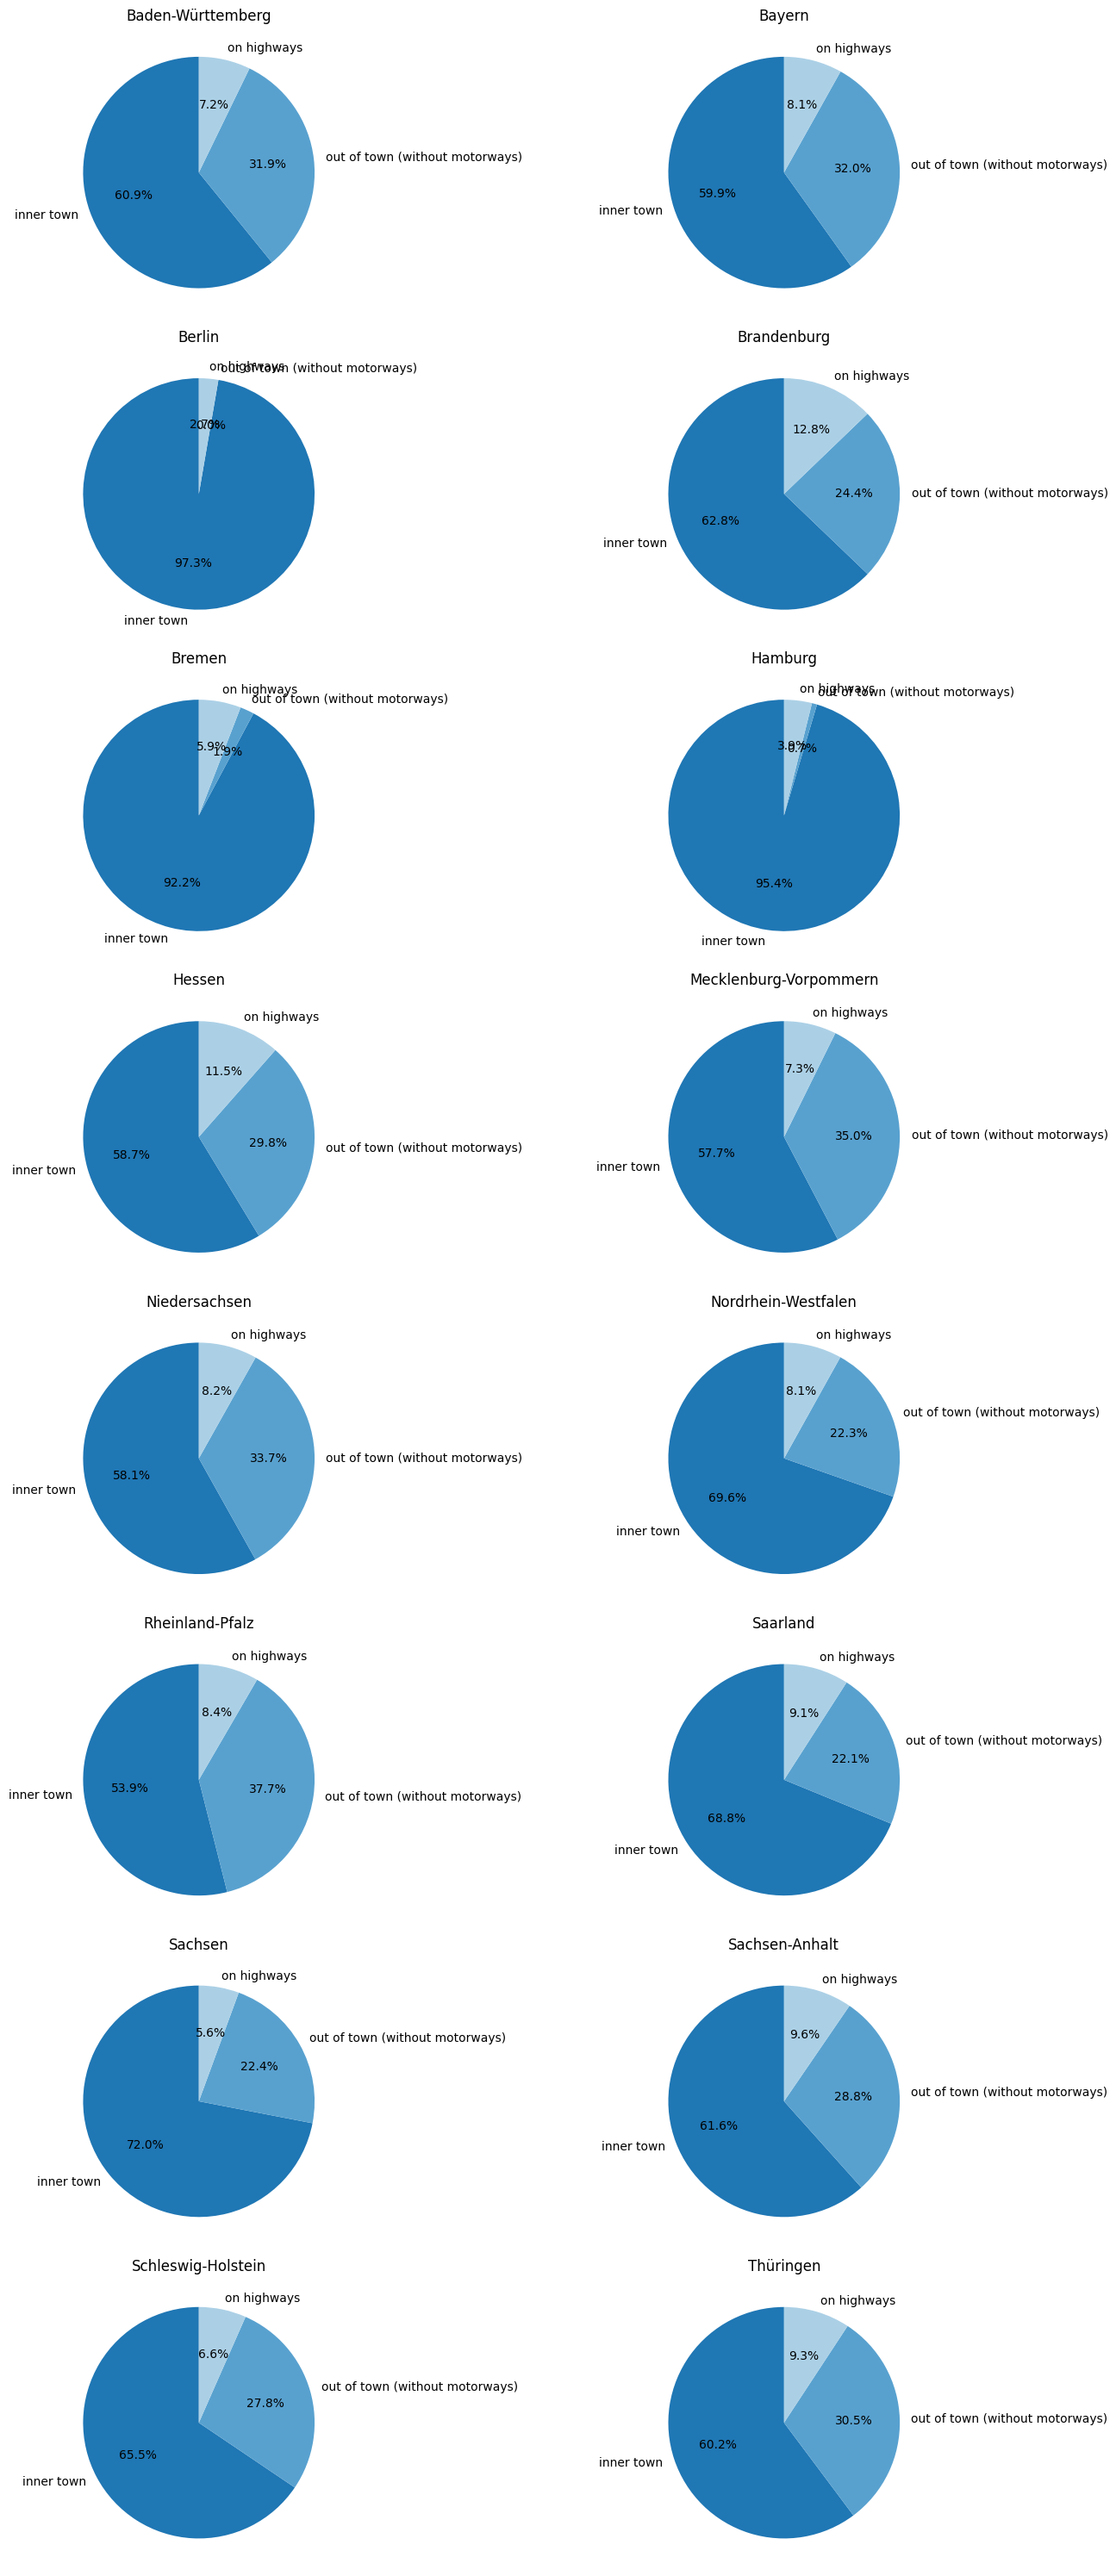

In [28]:
import matplotlib.pyplot as plt
from math import ceil

plt.style.use('_mpl-gallery')
states = traffic["state"].unique().tolist()
places = traffic["place"].unique().tolist()
states.sort()

# plot
fig, ax = plt.subplots(ceil(len(states) / 2), 2, figsize=(15, 30))

labels = [p for p in places if p != "In total"]
ax = ax.flatten()

for state, index in zip(states, range(16)):
    state_total_accidents = traffic[
        (traffic["state"] == state) & (
                traffic["severity"] == "In total") & (
                traffic["place"] != "In total")
        ]
    state_total_accidents['sum'] = state_total_accidents.iloc[:, 3:-2].sum(axis=1)
    values = state_total_accidents['sum'].tolist()
    ax[index].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[index].set_title(state)

plt.tight_layout()
plt.show()

For our main question we can use the below graphs, where side by side we have the rains prec and the total number of accidents in each state.

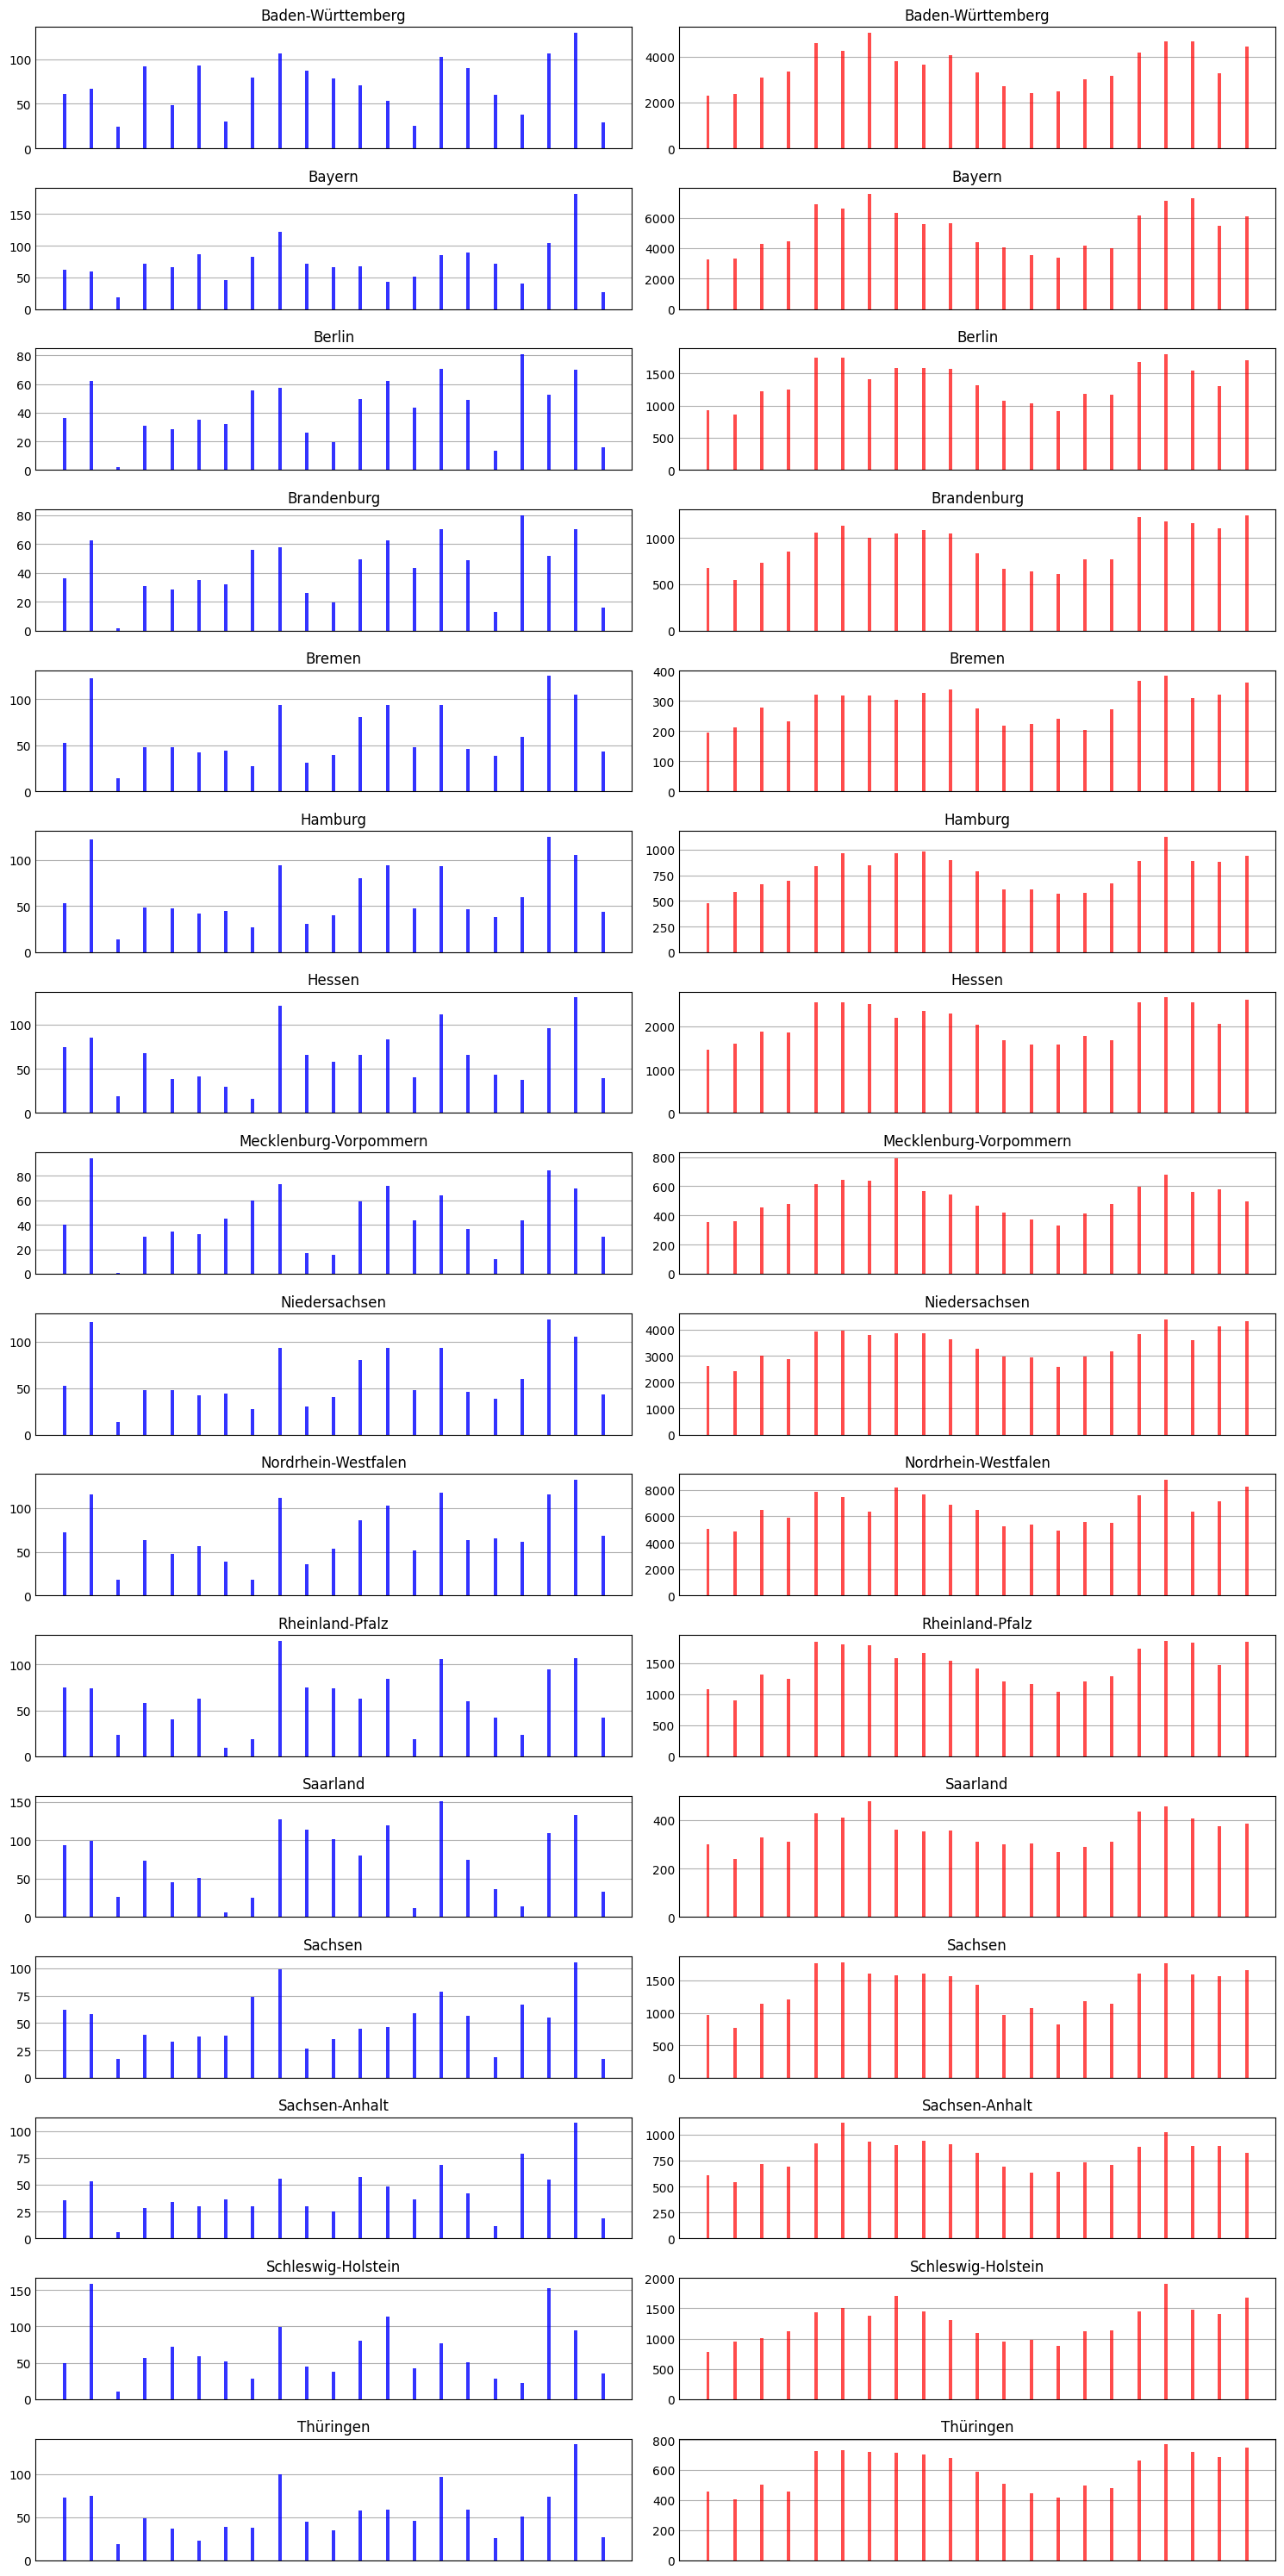

In [29]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')
states = traffic["state"].unique().tolist()
states.sort()

# plot
fig, ax = plt.subplots(len(states), 2, figsize=(15, 30))

years_labels = list(traffic.columns[3:-2])
month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}
years_labels = [
    f"{month_dict[datetime.strptime(date, '%d-%m-%Y').month]}-{date[-2:]}"
    for date in years_labels
]

for state, index in zip(states, range(16)):
    state_rain = rain[rain["state"] == state].iloc[0, 1:-3].values
    state_total_accidents = traffic[
                                (traffic["state"] == state) & (traffic["place"] == "In total") & (
                                        traffic["severity"] == "In total")
                                ].iloc[0, 3:-2].values

    ax[index][0].bar(years_labels, state_rain, width=np.pi / 25, alpha=0.8, color="blue",
                     label='Rain')
    ax[index][0].set_xticks([])
    ax[index][0].set_xticklabels([])

    ax[index][1].bar(years_labels, state_total_accidents, width=np.pi / 25, alpha=0.7, color='red',
                     label='Accident')
    ax[index][1].set_xticks([])
    ax[index][1].set_xticklabels([])

    ax[index][0].set_title(state)
    ax[index][1].set_title(state)

plt.tight_layout()
plt.show()

We can see that even in months when the rain precipitation is low the accidents rate is higher.

Let us check if it will affect in different location types (to answer our second question)

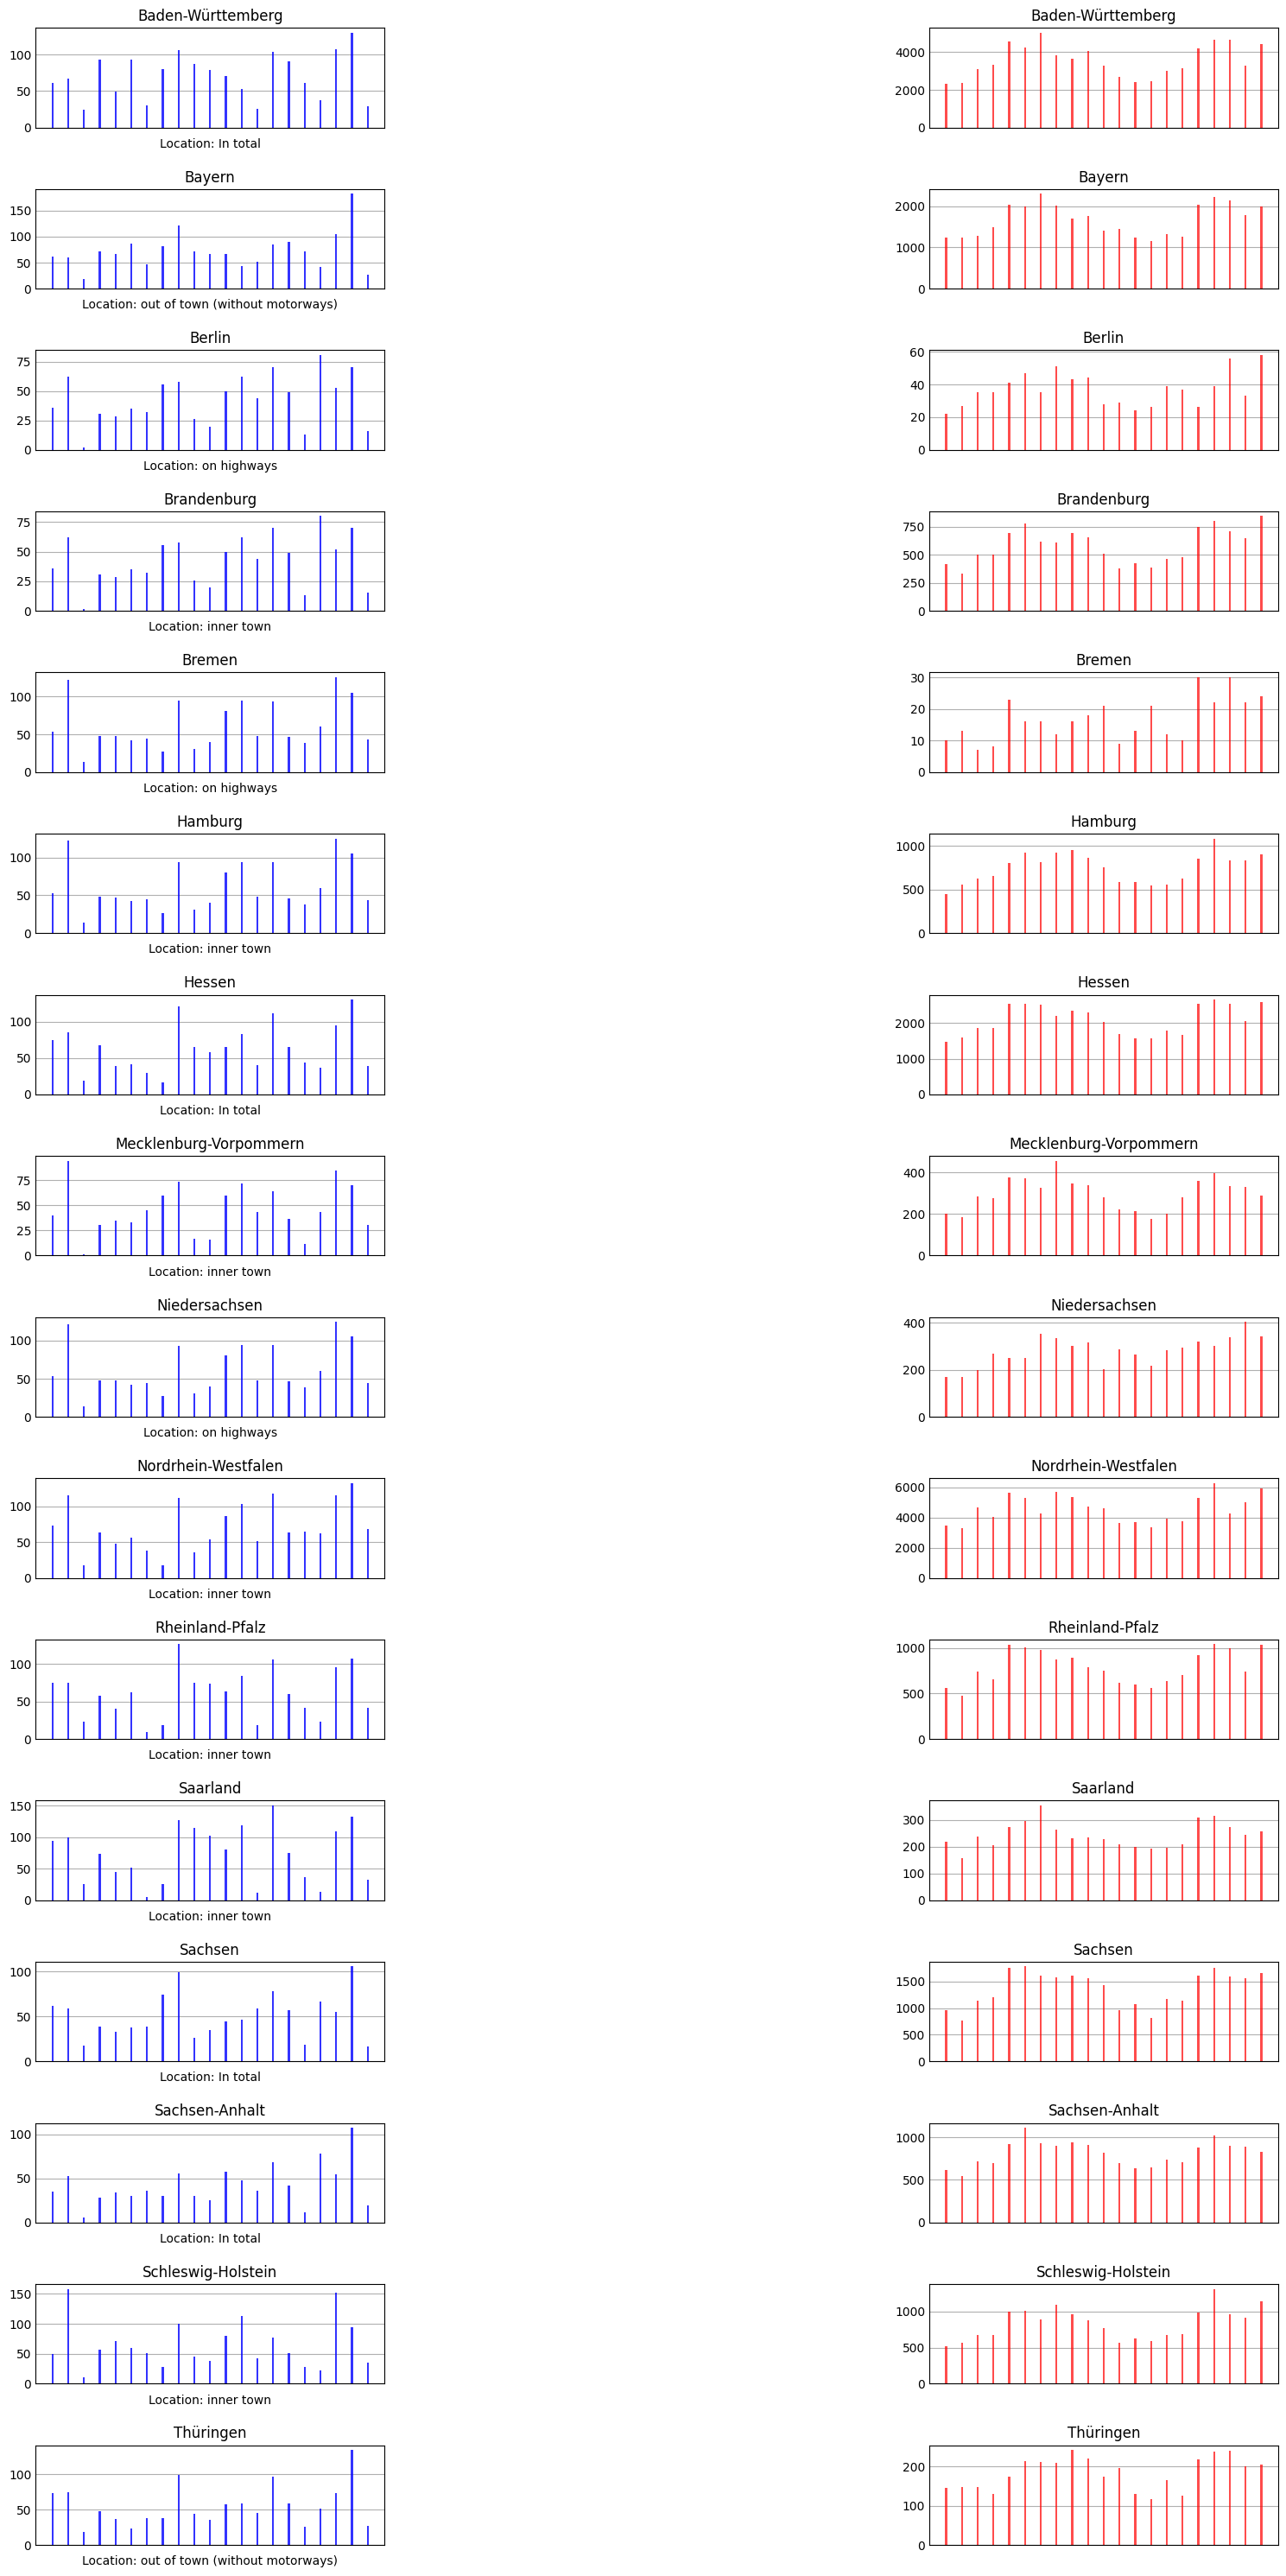

In [30]:
import random
places = traffic["place"].unique().tolist()
fig, ax = plt.subplots(len(states), 2, figsize=(15, 30))


for state, index in zip(states, range(16)):
    picked_location = places[random.randint(0, len(places)-1)]
    state_rain = rain[rain["state"] == state].iloc[0, 1:-3].values
    state_total_accidents = traffic[
                                (traffic["state"] == state) & (traffic["place"] == picked_location) & (
                                        traffic["severity"] == "In total")
                                ].iloc[0, 3:-2].values

    ax[index][0].bar(years_labels, state_rain, width=np.pi / 25, alpha=0.8, color="blue",
                     label='Rain')
    ax[index][0].set_xticks([])
    ax[index][0].set_xticklabels([])

    ax[index][1].bar(years_labels, state_total_accidents, width=np.pi / 25, alpha=0.7, color='red',
                     label='Accident')
    ax[index][1].set_xticks([])
    ax[index][1].set_xticklabels([])
    # Set custom text
    ax[index, 1].text(0.5, -0.2, f'Location: {picked_location}', ha='center', transform=ax[index, 0].transAxes)



    ax[index][0].set_title(state)
    ax[index][1].set_title(state)

plt.tight_layout()
plt.show()

We can arrive at the same conclusion that even in different specific locations rain is not a big factor in the accidents number.

# Discussion/Conclusions
We can see that rain does not necessarily affect the accidents rate in the state of Germany. Other factors such as:
- the road conditions,
- driving under the influence,
- car conditions
- traffic numbers (cars crossing at the time)

might play a bigger role in accidents number. 
Also rain does not necessarily mean that weather does not play a role, maybe snow or foggy weather has a bigger affect.
 
Another thing to account which is a limitation in this project as well is the amount of data for the accidents, which is expended in a year and a half period.
I believe that taking all the others factor as well as having accident data throughout all the year can give a more solid answer weather or not rain affects the accident rates.